In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Ingestion and Data Cleaning

In [2]:
election_2014 = pd.read_csv('datasets/constituency_wise_results_2014.csv')
election_2014.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


In [3]:
election_2014['candidate']= election_2014['candidate'].str.replace('None of the Above', 'NOTA')
election_2014['sex'] = election_2014['sex'].fillna('NOTA')
election_2014['age'] = election_2014['age'].fillna(0)
election_2014['category']=election_2014['category'].replace('Gen','GEN')
election_2014['category'] = election_2014['category'].fillna('NOTA')
election_2014['pc_name'] = election_2014['pc_name'].str.replace(" - ", " ")
election_2014['pc_name'] = election_2014['pc_name'].str.replace("-", " ")


In [4]:
election_2014['candidate'] = election_2014['candidate'].str.rstrip()
election_2014['sex']=election_2014['sex'].str.rstrip()
election_2014['category']=election_2014['category'].str.rstrip()
election_2014['pc_name']=election_2014['pc_name'].str.rstrip()
election_2014['pc_name']=election_2014['pc_name'].str.replace('CHELVELLA','Chevella')
election_2014['pc_name']=election_2014['pc_name'].str.replace('Bikaner','Bikaner (SC)')
election_2014['pc_name']=election_2014['pc_name'].str.replace('Dadar & Nagar Haveli','Dadra And Nagar Haveli')
election_2014['pc_name']=election_2014['pc_name'].str.replace('joynagar','jaynagar')
election_2014['pc_name']=election_2014['pc_name'].str.replace('burdwan durgapur','bardhaman durgapur')


In [5]:
election_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8355 non-null   object 
 1   pc_name         8355 non-null   object 
 2   candidate       8355 non-null   object 
 3   sex             8355 non-null   object 
 4   age             8355 non-null   float64
 5   category        8355 non-null   object 
 6   party           8355 non-null   object 
 7   party_symbol    8355 non-null   object 
 8   general_votes   8355 non-null   int64  
 9   postal_votes    8355 non-null   int64  
 10  total_votes     8355 non-null   int64  
 11  total_electors  8355 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB


In [6]:
election_2014[election_2014['state'] =='Andhra Pradesh' ]['pc_name'].value_counts()

Malkajgiri       31
Secundrabad      31
Khammam          28
Kakinada         23
Visakhapatnam    23
Vijayawada       23
Peddapalle       18
Mahabubabad      18
Karimnagar       18
Nizamabad        17
Hyderabad        17
Chevella         16
Eluru            16
Ongole           16
Narsapuram       15
Rajahmundry      15
Amalapuram       15
Bapatla          15
Nellore          15
Nandyal          15
Tirupati         15
Kadapa           15
Bhongir          14
Anantapur        14
Medak            14
Kurnool          13
Warangal         13
Hindupur         13
Guntur           13
Machilipatnam    12
Narasaraopet     12
Aruku            12
Srikakulam       11
Zahirabad        11
Vizianagaram     10
Nalgonda         10
Rajampet         10
Mahbubnagar      10
Adilabad          9
Anakapalli        9
Chittoor          8
Nagarkurnool      7
Name: pc_name, dtype: int64

In [7]:
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Adilabad'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Peddapalle'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Karimnagar'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Nizamabad'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Zahirabad'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Medak'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Malkajgiri'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Secundrabad'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Hyderabad'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Mahbubnagar'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Chevella'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Nagarkurnool'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Nalgonda'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Bhongir'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Warangal'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Mahabubabad'), 'state'] = 'Telangana'
election_2014.loc[(election_2014['state'] == 'Andhra Pradesh') & (election_2014['pc_name'] == 'Khammam'), 'state'] = 'Telangana'


In [8]:
election_2019 = pd.read_csv('datasets/constituency_wise_results_2019.csv')
election_2019.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418


In [9]:
election_2019['sex'] = election_2019['sex'].fillna('NOTA')
election_2019['sex']= election_2019['sex'].str.replace('MALE' ,'M')
election_2019['sex']= election_2019['sex'].str.replace('FEMALE' ,'F')
election_2019['sex']= election_2019['sex'].str.replace('THIRD' ,'O')
election_2019['category']=election_2019['category'].replace('GENERAL','GEN')
election_2019['category'] =election_2019['category'].fillna('NOTA')
election_2019['age'] = election_2019['age'].fillna(0)

# Data Visualization and Insights

# Primary Insights

In [10]:
election_2014['voter_turnout'] = round(election_2014['total_votes'] / election_2014['total_electors']*100,2)
election_2019['voter_turnout'] = round(election_2019['total_votes'] / election_2019['total_electors']*100,2)

# 1) List top 5/ bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio?

# Top 5 Constituencies of 2014 in terms of votor turnout ratio

In [11]:
group_pc_names=election_2014.groupby('pc_name')['voter_turnout'].mean().reset_index()

In [12]:
top_pc_names = group_pc_names.sort_values(by='voter_turnout', ascending=False).head(5)
top_pc_names

,pc_name,voter_turnout
480,Tura,26.033333
341,Nagaland,21.955000
0,ARUNACHAL EAST,20.890000
133,Daman & diu,15.602000
295,MIZORAM,15.422500


<BarContainer object of 5 artists>

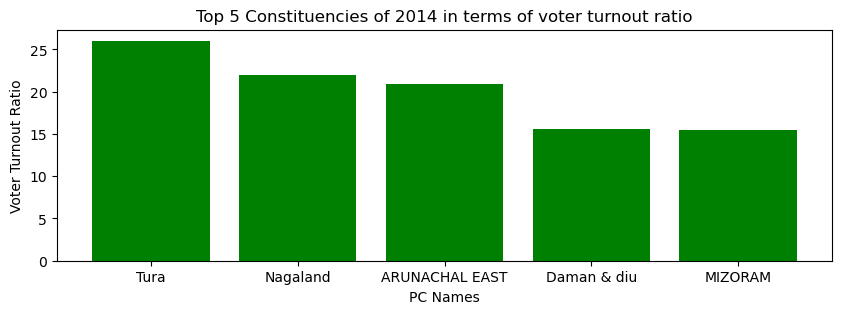

In [13]:
plt.figure(figsize=(10, 3))
plt.title('Top 5 Constituencies of 2014 in terms of voter turnout ratio')
plt.xlabel('PC Names')
plt.ylabel('Voter Turnout Ratio')

plt.bar(top_pc_names['pc_name'], top_pc_names['voter_turnout'], color='green')


# Bottom 5 Constituencies of 2014 in terms of voter turnout ratio

In [14]:
bottom_pc_names = group_pc_names.sort_values(by='voter_turnout', ascending=True).head(5)
bottom_pc_names

,pc_name,voter_turnout
495,Varanasi,1.356977
113,Chennai South,1.387674
20,Amethi,1.496286
112,Chennai North,1.560000
311,Malkajgiri,1.641613


<BarContainer object of 5 artists>

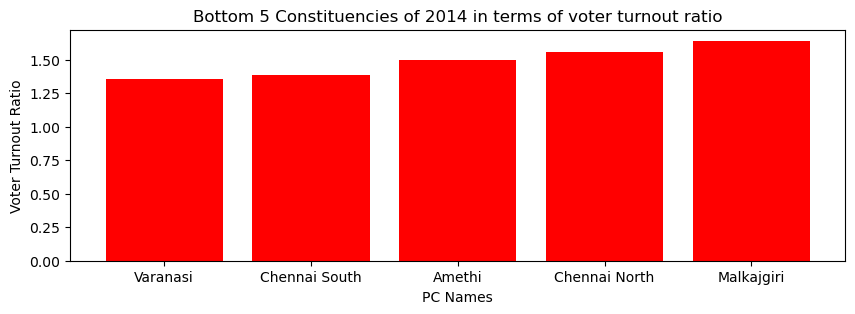

In [15]:
plt.figure(figsize=(10, 3))
plt.title('Bottom 5 Constituencies of 2014 in terms of voter turnout ratio')
plt.xlabel('PC Names')
plt.ylabel('Voter Turnout Ratio')

plt.bar(bottom_pc_names['pc_name'], bottom_pc_names['voter_turnout'], color='red')

# Top 5 Constituencies of 2019 in terms of votor turnout ratio

In [16]:
group_pc_names=election_2019.groupby('pc_name')['voter_turnout'].mean().reset_index()

In [17]:
top_pc_names = group_pc_names.sort_values(by='voter_turnout', ascending=False).head(5)
top_pc_names

,pc_name,voter_turnout
512,Tura,20.3275
366,Nagaland,16.5840
365,Nabarangpur,15.8780
0,ARUNACHAL EAST,14.4100
144,Daman & diu,14.3700


<BarContainer object of 5 artists>

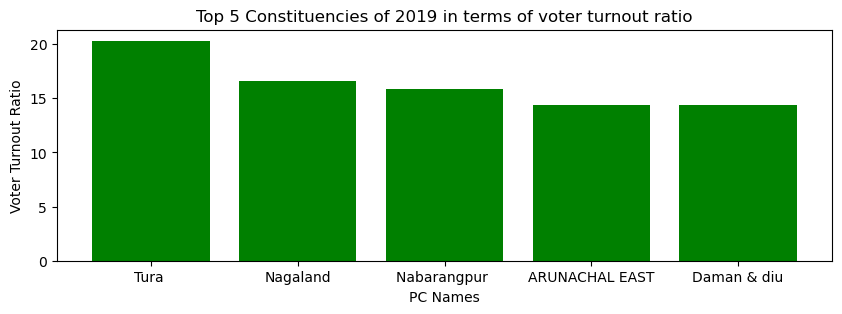

In [18]:
plt.figure(figsize=(10, 3))
plt.title('Top 5 Constituencies of 2019 in terms of voter turnout ratio')
plt.xlabel('PC Names')
plt.ylabel('Voter Turnout Ratio')

plt.bar(top_pc_names['pc_name'], top_pc_names['voter_turnout'], color='green')

# Bottom 5 Constituencies of 2019 in terms of votor turnout ratio

In [19]:
bottom_pc_names = group_pc_names.sort_values(by='voter_turnout', ascending=True).head(5)
bottom_pc_names

,pc_name,voter_turnout
386,Nizamabad,0.367957
29,Anantnag,0.470000
484,Srinagar,1.110769
88,Belgaum,1.168103
373,Nalanda,1.354444


<BarContainer object of 5 artists>

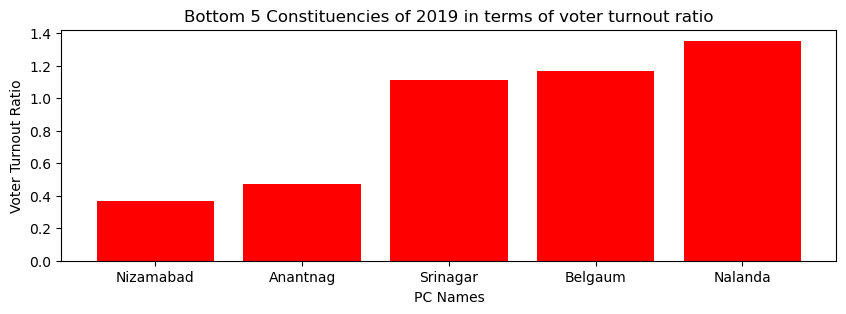

In [20]:
plt.figure(figsize=(10, 3))
plt.title('Bottom 5 Constituencies of 2019 in terms of voter turnout ratio')
plt.xlabel('PC Names')
plt.ylabel('Voter Turnout Ratio')

plt.bar(bottom_pc_names['pc_name'], bottom_pc_names['voter_turnout'], color='red')

# 2) List top 5/ bottom 5 states of 2014 and 2019 in terms of voter turnout ratio

In [21]:
group_state=election_2014.groupby('state')['voter_turnout'].mean().reset_index()

In [22]:
top_states_names = group_state.sort_values(by='voter_turnout', ascending=False).head(5)
top_states_names

,state,voter_turnout
23,Nagaland,21.955000
7,Daman & Diu,15.602000
21,Mizoram,15.422500
16,Lakshadweep,12.372857
2,Arunachal Pradesh,12.210000


<BarContainer object of 5 artists>

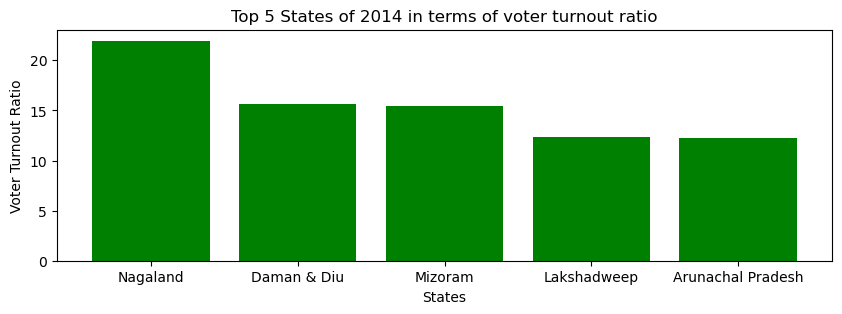

In [23]:
plt.figure(figsize=(10, 3))
plt.title('Top 5 States of 2014 in terms of voter turnout ratio')
plt.xlabel('States')
plt.ylabel('Voter Turnout Ratio')

plt.bar(top_states_names['state'], top_states_names['voter_turnout'], color='green')

In [24]:
bottom_states_names = group_state.sort_values(by='voter_turnout', ascending=True).head(5)
bottom_states_names

,state,voter_turnout
24,Puducherry,2.648387
22,NCT OF Delhi,2.906624
10,Haryana,2.977250
18,Maharashtra,3.072275
28,Tamil Nadu,3.263382


<BarContainer object of 5 artists>

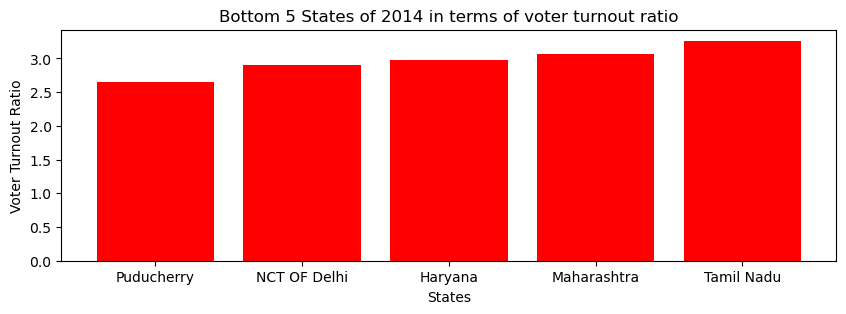

In [25]:
plt.figure(figsize=(10, 3))
plt.title('Bottom 5 States of 2014 in terms of voter turnout ratio')
plt.xlabel('States')
plt.ylabel('Voter Turnout Ratio')

plt.bar(bottom_states_names['state'], bottom_states_names['voter_turnout'], color='red')

In [26]:
group_state=election_2019.groupby('state')['voter_turnout'].mean().reset_index()

In [27]:
top_states_names = group_state.sort_values(by='voter_turnout', ascending=False).head(5)
top_states_names

,state,voter_turnout
24,Nagaland,16.584000
8,Daman & Diu,14.370000
21,Meghalaya,13.342727
17,Lakshadweep,12.167143
2,Arunachal Pradesh,11.695000


<BarContainer object of 5 artists>

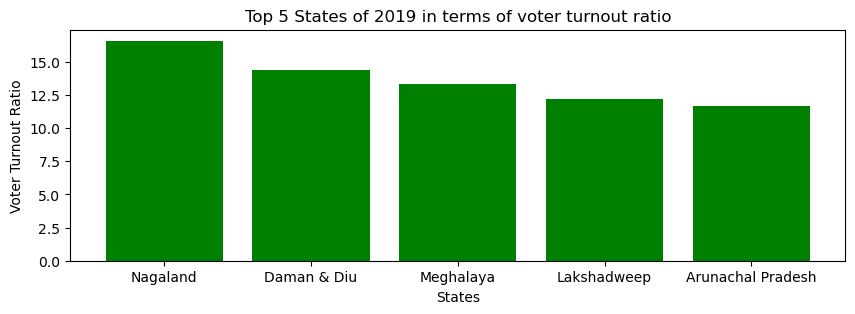

In [28]:
plt.figure(figsize=(10, 3))
plt.title('Top 5 States of 2019 in terms of voter turnout ratio')
plt.xlabel('States')
plt.ylabel('Voter Turnout Ratio')

plt.bar(top_states_names['state'], top_states_names['voter_turnout'], color='green')

In [29]:
bottom_states_names = group_state.sort_values(by='voter_turnout', ascending=True).head(5)
bottom_states_names

,state,voter_turnout
5,Chandigarh,1.907297
31,Telangana,2.380239
23,NCT OF Delhi,2.477193
27,Punjab,2.942371
11,Haryana,3.023433


<BarContainer object of 5 artists>

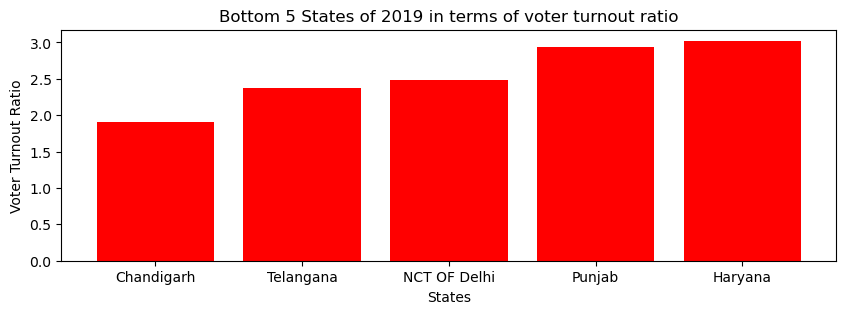

In [30]:
plt.figure(figsize=(10, 3))
plt.title('Bottom 5 States of 2019 in terms of voter turnout ratio')
plt.xlabel('States')
plt.ylabel('Voter Turnout Ratio')

plt.bar(bottom_states_names['state'], bottom_states_names['voter_turnout'], color='red')

# Q 3. Which constituencies have elected the same party for 2 consecutive elections, rank them by % of votes to that winning party in 2019

In [31]:
# Step 1: Get the winning parties
winning_2014 = election_2014.loc[election_2014.groupby('pc_name')['total_votes'].idxmax()]
winning_2014 = winning_2014[['pc_name', 'party', 'total_votes']].rename(columns={'party': 'party_2014', 'total_votes': 'votes_2014'})

winning_2019 = election_2019.loc[election_2019.groupby('pc_name')['total_votes'].idxmax()]
winning_2019 = winning_2019[['pc_name', 'party', 'total_votes']].rename(columns={'party': 'party_2019', 'total_votes': 'votes_2019'})

In [32]:
# Step 2: finding total_votes per constituency
votes_2014 = election_2014.groupby("pc_name").total_votes.sum().rename("pc_total_votes_2014")
winning_2014 = winning_2014.merge(votes_2014, left_on="pc_name", right_on=votes_2014.index)
winning_2014['winner % votes 2014'] = round((winning_2014.votes_2014*100)/winning_2014.pc_total_votes_2014 , 2)

votes_2019 = election_2019.groupby("pc_name").total_votes.sum().rename("pc_total_votes_2019")
winning_2019 = winning_2019.merge(votes_2019, left_on="pc_name", right_on=votes_2019.index)
winning_2019['winner % votes 2019'] = round((winning_2019.votes_2019*100)/winning_2019.pc_total_votes_2019 , 2)

In [33]:
# Step 3: Merge the data
merged = pd.merge(winning_2014, winning_2019, on='pc_name')

In [34]:
# Step 4: Filter to keep only constituencies where the same party won in both elections
same_pc = merged[merged['party_2014'] == merged['party_2019']]
same_pc[["pc_name", "party_2014", "party_2019", "winner % votes 2019"]].sort_values("winner % votes 2019", ascending=False)

,pc_name,party_2014,party_2019,winner % votes 2019
410,Surat,BJP,BJP,74.47
318,Navsari,BJP,BJP,74.37
438,Vadodara,BJP,BJP,72.30
223,Kangra,BJP,BJP,72.02
81,Bhilwara,BJP,BJP,71.59
...,...,...,...,...
257,Ladakh,BJP,BJP,33.94
240,Kishanganj,INC,INC,33.32
273,Maharajganj,BJP,BJP,33.02
171,Hamirpur,BJP,BJP,32.84


# Q 4. Which constituencies have voted for different parties in two elections (list top 10 based on difference (2019-2014) in winner vote percentage in two elections).

In [35]:
different_pc = merged[merged['party_2014'] != merged['party_2019']]

different_pc.loc[:, "difference_winner_%_of_votes"] = different_pc.loc[:, 'winner % votes 2014'] - different_pc.loc[:, 'winner % votes 2019']

different_pc[["pc_name", "party_2014", "party_2019", "winner % votes 2014", "winner % votes 2019" ,"difference_winner_%_of_votes"]].sort_values("difference_winner_%_of_votes", ascending=True).head(10).reset_index(drop=True)

C:\Users\91880\AppData\Local\Temp\ipykernel_9556\2820358800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_pc.loc[:, "difference_winner_%_of_votes"] = different_pc.loc[:, 'winner % votes 2014'] - different_pc.loc[:, 'winner % votes 2019']


,pc_name,party_2014,party_2019,winner % votes 2014,winner % votes 2019,difference_winner_%_of_votes
0,Alipurduars,AITC,BJP,29.62,54.40,-24.78
1,Autonomous District,INC,BJP,39.23,61.73,-22.50
2,Kanniyakumari,BJP,INC,37.64,59.83,-22.19
3,Puducherry,AINRC,INC,34.57,56.27,-21.70
4,Bhagalpur,RJD,JD(U),37.74,59.30,-21.56
5,Sambhal,BJP,SP,34.08,55.60,-21.52
6,Jhanjharpur,BJP,JD(U),35.64,56.80,-21.16
7,Chikkballapur,INC,BJP,33.63,53.78,-20.15
8,Ghazipur,BJP,BSP,31.11,51.20,-20.09
9,Supaul,INC,JD(U),34.30,53.78,-19.48


# Q 5. Top 5 candidates based on margin difference with runners in 2014 and 2019

In [36]:
# create a function to filter top candidates by margin
def get_top_5_candidates_by_margin(df):
    df["rnk"] = df.groupby("pc_name")["total_votes"].rank(method="max", ascending=False)

    # filter rank 1 candidates
    df_rank_1 = df[df.rnk == 1.0]
    df_rank_1 = df_rank_1[["pc_name", "candidate", "total_votes"]].rename(columns={"total_votes": "rank_1_votes"})

    # filter rank 2 candidates
    df_rank_2 = df[df.rnk == 2.0]
    df_rank_2 = df_rank_2[["pc_name", "total_votes"]].rename(columns={"total_votes": "rank_2_votes"})

    # merge dataframes to get pc_name, candidate, rank_1_votes, rank_2_votes, margin
    df_rank = pd.merge(df_rank_1, df_rank_2, on="pc_name")
    df_rank["margin"] = df_rank.rank_1_votes - df_rank.rank_2_votes

    # create a column of rank_1 votes to rank_2 votes ratio
    df_rank["rank_1/2_vote_ratio"] = round(df_rank.rank_1_votes/df_rank.rank_2_votes, 2)
    df_top_5_by_margin = df_rank.sort_values("margin", ascending=False).reset_index(drop=True).head()

    return df_top_5_by_margin[['pc_name','candidate','margin']]

In [37]:
get_top_5_candidates_by_margin(election_2014)

,pc_name,candidate,margin
0,Vadodara,NARENDRA MODI,570128
1,Ghaziabad,VIJAY KUMAR SINGH,567260
2,Navsari,C. R. PATIL,558116
3,Jaipur,RAMCHARAN BOHARA,539345
4,Surat,DARSHANA VIKRAM JARDOSH,533190


In [38]:
get_top_5_candidates_by_margin(election_2019)

,pc_name,candidate,margin
0,Navsari,C. R. Patil,689668
1,Karnal,Sanjay Bhatia,656142
2,Faridabad,KRISHAN PAL,638239
3,Bhilwara,SUBHASH CHANDRA BAHERIA,612000
4,Vadodara,RANJANBEN BHATT,589177


# Q 6. % split of votes of parties between 2014 vs 2019 at national level

In [39]:
# create a function to plot pie chart of % vote split
def plot_top_n_party_vote_share(df, n):
    df = df.groupby("party")["total_votes"].sum().sort_values(ascending=False)
    if df.shape[0] > n:
        df_n = df[:n]
        df_others = df[n:]
        df_n.loc["others"] = sum(df_others)
    else:
        df_n = df
    df_n.plot(kind="pie", autopct="%.2f%%", cmap='tab10')

In [40]:
# Top 5 parties with highest vote share % 2014
df_party_total = pd.DataFrame(election_2014.groupby("party")["total_votes"].sum()).reset_index().sort_values("total_votes", ascending=False)
df_party_total["%_vote_split_2014"] = round(df_party_total["total_votes"]*100/sum(df_party_total["total_votes"]), 2)
df_party_total.head(5)

,party,total_votes,%_vote_split_2014
80,BJP,161047761,30.97
163,INC,96641749,18.58
110,BSP,22434033,4.31
31,AITC,21215661,4.08
385,SP,18632568,3.58


In [41]:
# Top 5 parties with highest vote share % 2019
df_party_total = pd.DataFrame(election_2019.groupby("party")["total_votes"].sum()).reset_index().sort_values("total_votes", ascending=False)
df_party_total["%_vote_split_2019"] = round(df_party_total["total_votes"]*100/sum(df_party_total["total_votes"]), 2)
df_party_total.head(5)

,party,total_votes,%_vote_split_2019
126,BJP,229076879,37.30
239,INC,119495214,19.46
44,AITC,24929330,4.06
168,BSP,22246501,3.62
241,IND,16583326,2.70


# Q 7. % split of votes of parties between 2014 vs 2019 at state level

In [42]:
states_with_max_pc = election_2014.groupby("state")["pc_name"].nunique().sort_values(ascending=False).head()
states_with_max_pc

state
Uttar Pradesh    80
Maharashtra      48
West Bengal      42
Bihar            40
Tamil Nadu       39
Name: pc_name, dtype: int64

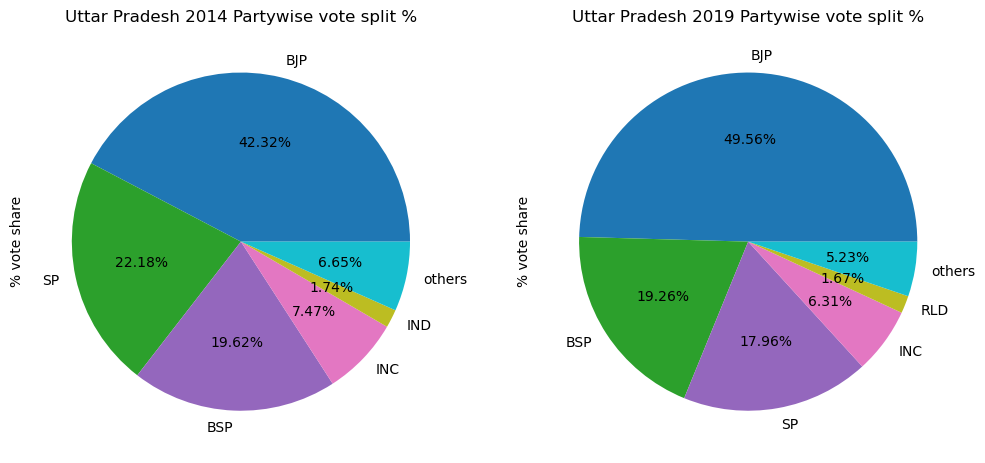

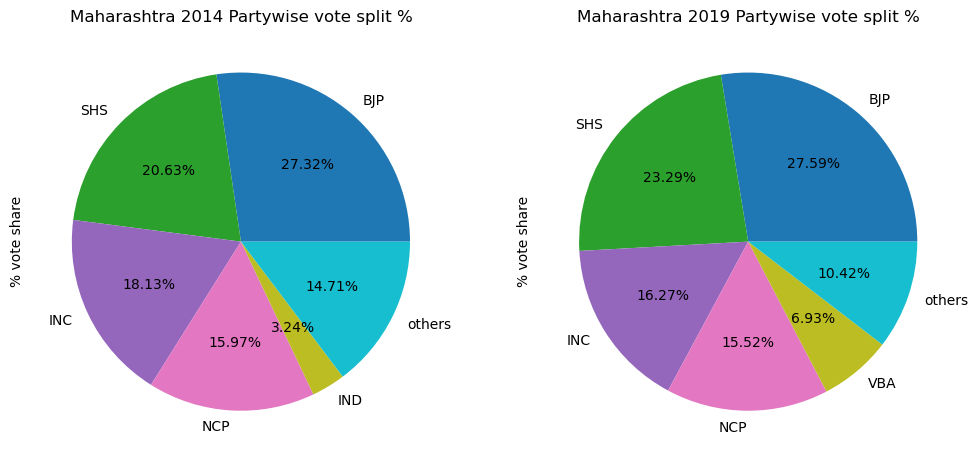

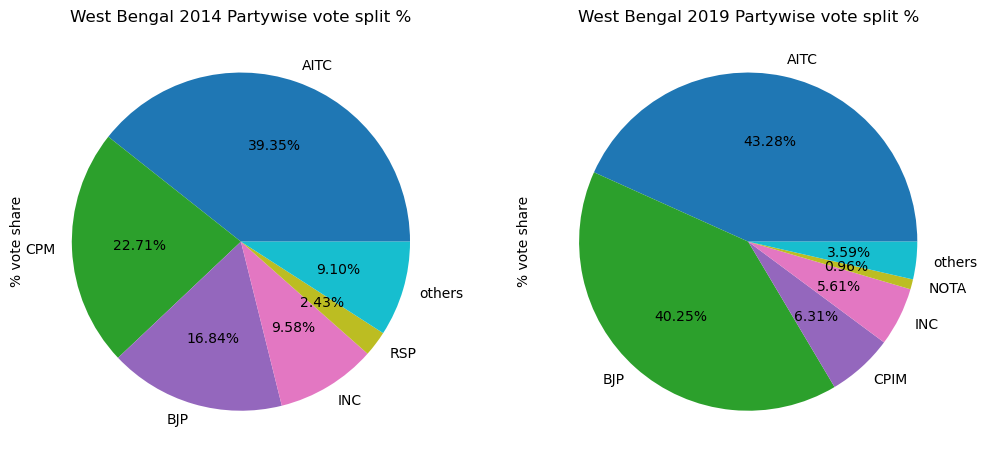

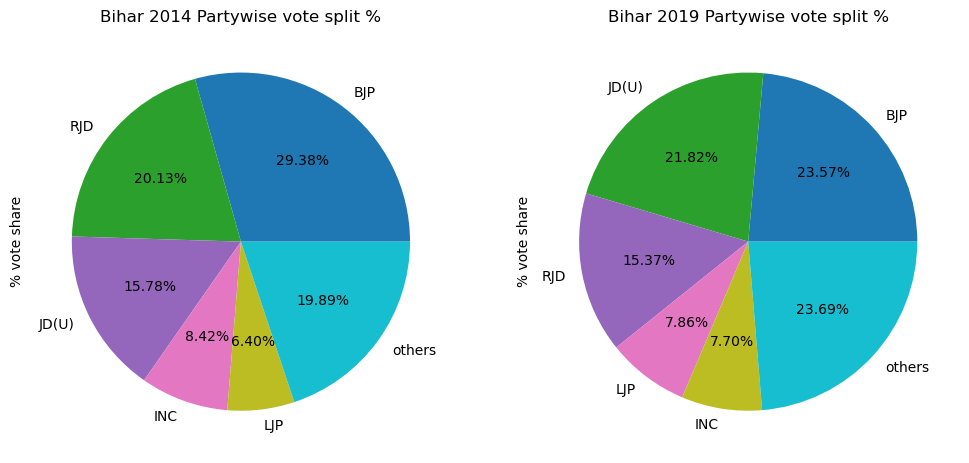

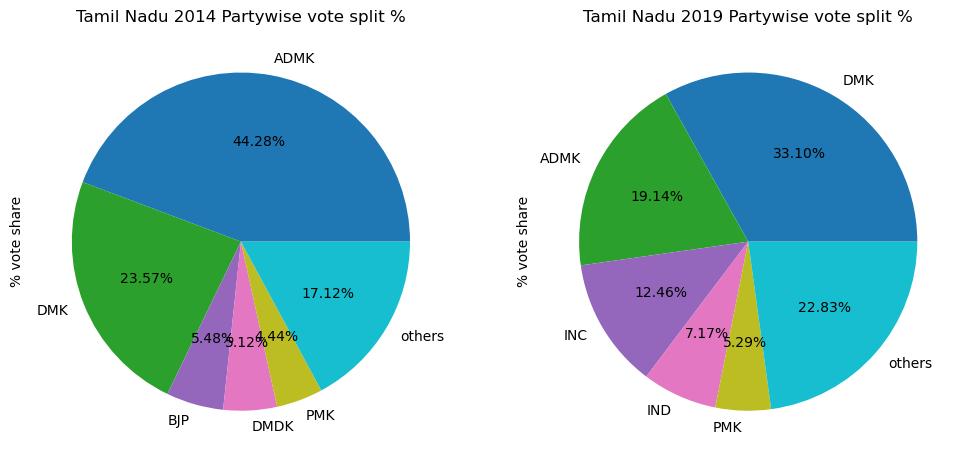

In [43]:
for state in states_with_max_pc.index:
    df_14 = election_2014[election_2014.state == state]
    df_19 = election_2019[election_2019.state == state]
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plot_top_n_party_vote_share(df_14, 5)
    plt.title(f"{state} 2014 Partywise vote split %")
    plt.ylabel("% vote share")
    plt.subplot(1,2,2)
    plot_top_n_party_vote_share(df_19, 5)
    plt.title(f"{state} 2019 Partywise vote split %")
    plt.ylabel("% vote share")

# Q 8. List top 5 constituencies for two major national parties where they have gained vote share in 2019 as compared to 2014

In [44]:
def top_5_pc_gain_loss(party, df_14=election_2014, df_19=election_2019, gain=True):
    # constituency-wise total number of votes
    df_pc_total_14 = df_14.groupby(["state", "pc_name"])["total_votes"].sum()
    df_pc_total_14.rename("pc_total_2014", inplace=True)

    df_pc_total_19 = df_19.groupby(["state", "pc_name"])["total_votes"].sum()
    df_pc_total_19.rename("pc_total_2019", inplace=True)

    # party-wise total number of votes
    df_party_14 = df_14[df_14.party == party][["state", "pc_name", "total_votes"]]
    df_party_14.rename(columns={"total_votes": "votes_2014"}, inplace=True)

    df_party_19 = df_19[df_19.party == party][["state", "pc_name", "total_votes"]]
    df_party_19.rename(columns={"total_votes": "votes_2019"}, inplace=True)

    # merge party-wise and constituency wise results
    df_1 = pd.merge(df_party_14, df_pc_total_14, on=["state", "pc_name"])
    df_2 = pd.merge(df_party_19, df_pc_total_19, on=["state", "pc_name"])

    # merge 2014 and 2019 results together
    df = pd.merge(df_1, df_2, on=["state", "pc_name"])

    # calculate % vote share in each constituency
    df["% votes_2014"] = round(df.votes_2014*100/df.pc_total_2014, 2)
    df["% votes_2019"] = round(df.votes_2019*100/df.pc_total_2019, 2)

    # calculate gain or loss
    df["% gain/loss"] = df["% votes_2019"] - df["% votes_2014"]

    # Filter necessary columns
    df = df[["state", "pc_name", "% votes_2014", "% votes_2019", "% gain/loss"]]

    # return constituencies with gain in vote share if gain = true
    if gain == True:
        return df.sort_values(by="% gain/loss", ascending=False).reset_index(drop=True).head()
        
    # return constituencies with loss in vote share if gain = false
    else:
        return df.sort_values(by="% gain/loss", ascending=True).reset_index(drop=True).head()

In [45]:
top_5_pc_gain_loss("BJP", gain=True)

,state,pc_name,% votes_2014,% votes_2019,% gain/loss
0,Tripura,Tripura West,5.10,51.77,46.67
1,West Bengal,Purulia,7.16,49.30,42.14
2,Tripura,Tripura East,6.37,46.12,39.75
3,West Bengal,Ranaghat,17.27,52.78,35.51
4,West Bengal,Jhargram,9.74,44.56,34.82


In [46]:
top_5_pc_gain_loss("INC", gain=True)

,state,pc_name,% votes_2014,% votes_2019,% gain/loss
0,Tamil Nadu,Karur,2.91,63.06,60.15
1,Tamil Nadu,Tiruchirappalli,5.21,59.28,54.07
2,Tamil Nadu,Arani,2.53,54.00,51.47
3,Tamil Nadu,Krishnagiri,3.64,52.64,49.00
4,Tamil Nadu,Sivaganga,10.19,52.20,42.01


# Q 9. List top 5 constituencies for two major national parties where they have lost vote share in 2019 as compared to 2014

In [47]:
top_5_pc_gain_loss("BJP", gain=False)

,state,pc_name,% votes_2014,% votes_2019,% gain/loss
0,Andhra Pradesh,Narsapuram,49.62,1.05,-48.57
1,Andhra Pradesh,Visakhapatnam,48.72,2.73,-45.99
2,Maharashtra,Sangli,58.43,42.77,-15.66
3,Daman & Diu,Daman & diu,53.83,42.98,-10.85
4,Uttar Pradesh,Muzaffarnagar,59.00,49.46,-9.54


In [48]:
top_5_pc_gain_loss("INC", gain=False)

,state,pc_name,% votes_2014,% votes_2019,% gain/loss
0,Dadra & Nagar Haveli,Dadra And Nagar Haveli,45.12,4.33,-40.79
1,Maharashtra,Aurangabad,36.51,7.66,-28.85
2,Arunachal Pradesh,ARUNACHAL WEST,38.02,14.22,-23.80
3,West Bengal,Raiganj,28.50,6.55,-21.95
4,Manipur,Outer manipur,38.45,17.77,-20.68


# Q 10. Which constituency has voted the most for nota?

In [49]:
df_nota_2014 = election_2014[election_2014.party == "NOTA"]
df_nota_2019 = election_2019[election_2019.party == "NOTA"]

In [50]:
df_nota_2014.groupby(["state","pc_name"])["total_votes"].sum().sort_values(ascending=False).head(5)

state           pc_name        
Tamil Nadu      Nilgiris           46559
Rajasthan       Banswara           34404
Gujarat         Dahod              32305
Madhya Pradesh  RATLAM             30364
Bihar           Samastipur (SC)    29211
Name: total_votes, dtype: int64

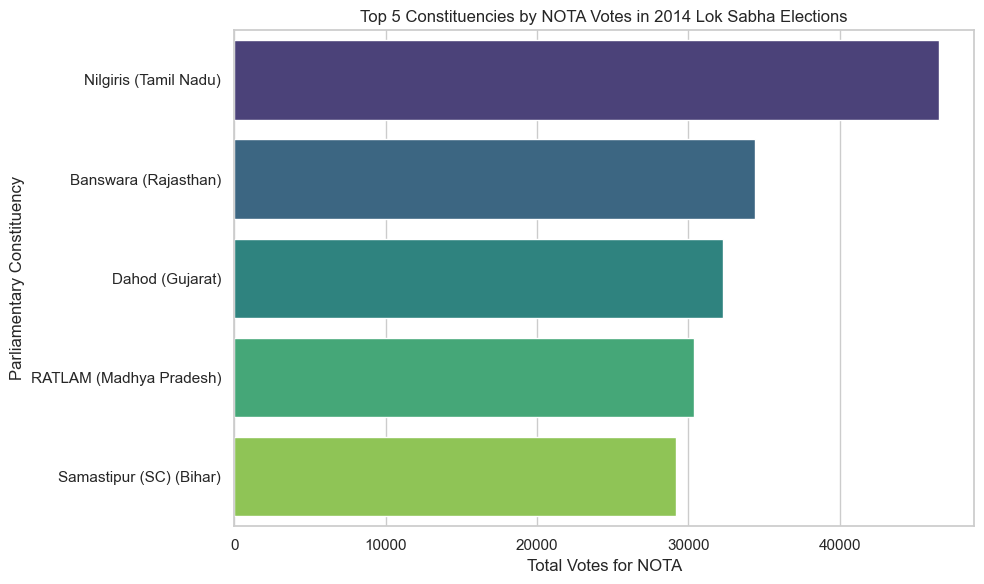

In [51]:
import seaborn as sns
# Set plot style
top_5_nota_2014=df_nota_2014.groupby(["state","pc_name"])["total_votes"].sum().sort_values(ascending=False).head(5).reset_index()
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="total_votes", y="pc_name", data=top_5_nota_2014, palette="viridis", orient='h')

# Add labels and title
plt.xlabel('Total Votes for NOTA')
plt.ylabel('Parliamentary Constituency')
plt.title('Top 5 Constituencies by NOTA Votes in 2014 Lok Sabha Elections')

# Add state names to the y-axis labels
y_labels = [f'{row["pc_name"]} ({row["state"]})' for index, row in top_5_nota_2014.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

# Show plot
plt.tight_layout()
plt.show()



In [52]:
df_nota_2019.groupby(["state","pc_name"])["total_votes"].sum().sort_values(ascending=False).head(5)

state           pc_name          
Bihar           Gopalganj (SC)       51660
Andhra Pradesh  Aruku                47977
Bihar           Paschim Champaran    45699
Odisha          Nabarangpur          44582
Chhattisgarh    BASTAR               41667
Name: total_votes, dtype: int64

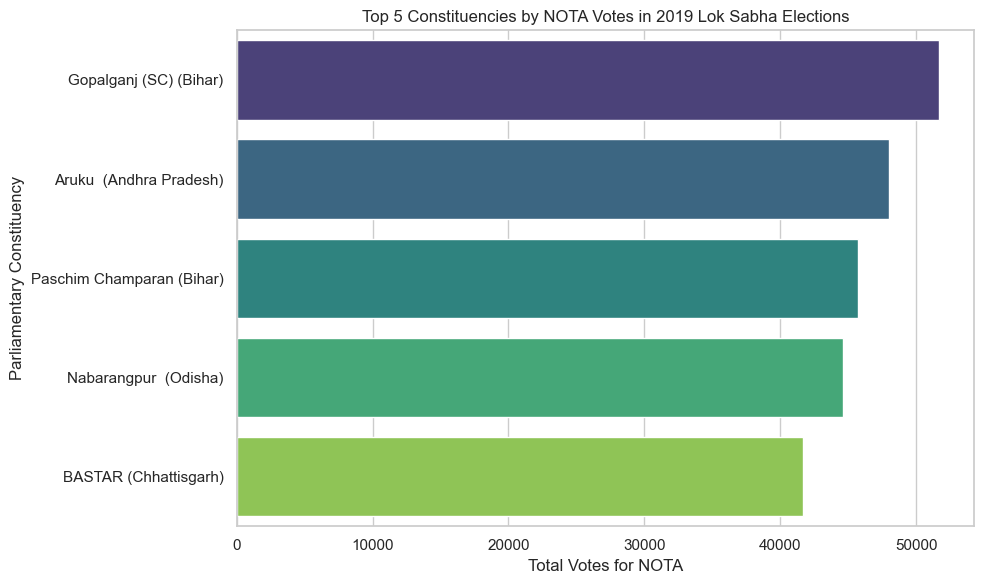

In [53]:
import seaborn as sns
# Set plot style
top_5_nota_2019=df_nota_2019.groupby(["state","pc_name"])["total_votes"].sum().sort_values(ascending=False).head(5).reset_index()
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="total_votes", y="pc_name", data=top_5_nota_2019, palette="viridis", orient='h')

# Add labels and title
plt.xlabel('Total Votes for NOTA')
plt.ylabel('Parliamentary Constituency')
plt.title('Top 5 Constituencies by NOTA Votes in 2019 Lok Sabha Elections')

# Add state names to the y-axis labels
y_labels = [f'{row["pc_name"]} ({row["state"]})' for index, row in top_5_nota_2019.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

# Show plot
plt.tight_layout()
plt.show()

# Q 11. Which constituencies have elected candidates whose party has less than 10% vote share at state level in 2019?

In [54]:
# Summarize total_votes by state and party
df_state_party = pd.DataFrame(election_2019.groupby(['state', 'party'])['total_votes'].sum()).reset_index()
df_state_party.rename(columns={"total_votes": "party_total_votes"}, inplace=True)

# calculate total_votes per state
df_state = election_2019.groupby("state")["total_votes"].sum().reset_index()
df_state.rename(columns={"total_votes": "state_total_votes"}, inplace=True)

# merge statewise total and partywise total
df_state_party = df_state_party.merge(df_state)

# calculate party share % in state
df_state_party["party_state_%"] = round(df_state_party.party_total_votes*100/df_state_party.state_total_votes, 2)

# merge party share % with constituency wise result dataframe
df_r19_party_state_pct = pd.merge(election_2019, df_state_party[["state", "party", "party_state_%"]], on=["state", "party"])

# filter winning candidates
df_winners_19 = df_r19_party_state_pct.loc[df_r19_party_state_pct.groupby('pc_name')['total_votes'].idxmax()]

# filter winning candidates where party_state_% < 10 % and filter necessary columns
cols = ["state", "pc_name", "candidate", "party", "party_state_%"]
df_winners_19[df_winners_19["party_state_%"] < 10][cols].sort_values("party_state_%").reset_index(drop=True)

,state,pc_name,candidate,party,party_state_%
0,Tamil Nadu,Ramanathapuram,K. NAVASKANI,IUML,1.08
1,Tamil Nadu,Chidambaram,THIRUMAAVALAVAN THOL,VCK,1.15
2,Uttar Pradesh,Robertsganj,PAKAURI LAL KOL,ADAL,1.20
3,Uttar Pradesh,Mirzapur,Anupriya Singh Patel,ADAL,1.20
4,Rajasthan,Nagaur,HANUMAN BENIWAL,RLTP,2.03
5,Kerala,Kottayam,Thomas Chazhikadan,KEC(M),2.07
6,Tamil Nadu,Coimbatore,NATARAJAN. P.R,CPIM,2.35
7,Tamil Nadu,Madurai,VENKATESAN S,CPIM,2.35
8,Tamil Nadu,Nagapattinam,SELVARAJ M,CPI,2.38
9,Tamil Nadu,Tiruppur,"SUBBARAYAN, K.",CPI,2.38


# Secondary Insights

# Q 1. Is there a correlation between postal votes % and voter turnout %?

Correlation between Postal Votes % and Voter Turnout % in 2014: 0.3873690815272068
Correlation between Postal Votes % and Voter Turnout % in 2019: 0.495887715812901


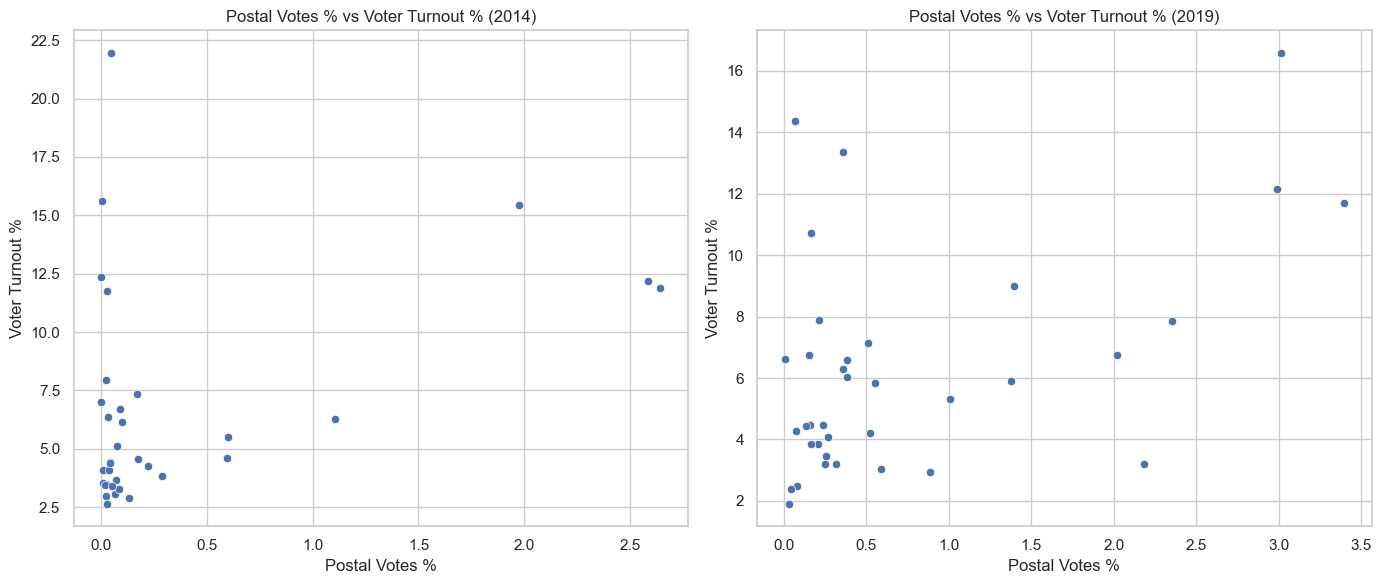

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming the data is already loaded into dataframes election_data_2014 and election_data_2019
# If not, load your data here
# election_data_2014 = pd.read_csv('constituency_wise_results_2014.csv')
# election_data_2019 = pd.read_csv('constituency_wise_results_2019.csv')

def calculate_percentages(df):
    # Calculate total votes
    df['total_votes'] = df['general_votes'] + df['postal_votes']
    # Calculate postal votes percentage
    df['postal_votes_pct'] = (df['postal_votes'] / df['total_votes']) * 100
    # Calculate voter turnout percentage
    df['voter_turnout_pct'] = (df['total_votes'] / df['total_electors']) * 100
    return df

election_data_2014 = calculate_percentages(election_2014)
election_data_2019 = calculate_percentages(election_2019)

def aggregate_by_state(df):
    aggregated = df.groupby('state').agg({
        'postal_votes_pct': 'mean',
        'voter_turnout_pct': 'mean'
    }).reset_index()
    return aggregated

agg_data_2014 = aggregate_by_state(election_data_2014)
agg_data_2019 = aggregate_by_state(election_data_2019)

# Calculate the Pearson correlation coefficient for 2014 and 2019
corr_2014, _ = pearsonr(agg_data_2014['postal_votes_pct'], agg_data_2014['voter_turnout_pct'])
corr_2019, _ = pearsonr(agg_data_2019['postal_votes_pct'], agg_data_2019['voter_turnout_pct'])

print(f"Correlation between Postal Votes % and Voter Turnout % in 2014: {corr_2014}")
print(f"Correlation between Postal Votes % and Voter Turnout % in 2019: {corr_2019}")

# Plot the data to visualize the correlation
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='postal_votes_pct', y='voter_turnout_pct', data=agg_data_2014)
plt.title('Postal Votes % vs Voter Turnout % (2014)')
plt.xlabel('Postal Votes %')
plt.ylabel('Voter Turnout %')

plt.subplot(1, 2, 2)
sns.scatterplot(x='postal_votes_pct', y='voter_turnout_pct', data=agg_data_2019)
plt.title('Postal Votes % vs Voter Turnout % (2019)')
plt.xlabel('Postal Votes %')
plt.ylabel('Voter Turnout %')

plt.tight_layout()
plt.show()


# Q 2. Is there any correlation between GDP of a state and voter turnout %?

Correlation between GDP and Voter Turnout in 2019: -0.41695597396912887


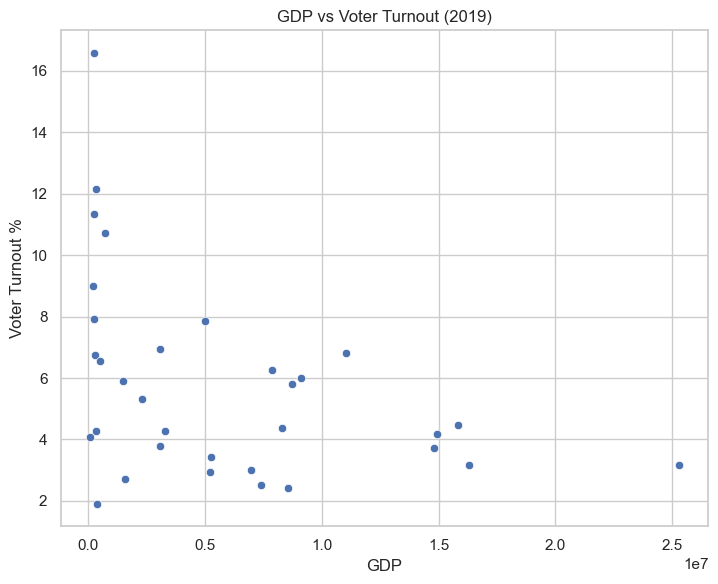

In [56]:
from scipy.stats import pearsonr
gdp_data = pd.read_csv('datasets/state_gdp_1819.csv')  # This file should have columns: 'state' and 'gdp'
gdp_data.state = gdp_data.state.apply(lambda x: x.replace("?*", ""))

# Calculate voter turnout percentage for each state
def calculate_voter_turnout(df):
    df['total_votes'] = df['general_votes'] + df['postal_votes']
    voter_turnout = df.groupby('state').apply(lambda x: (x['total_votes'].sum() / x['total_electors'].sum()) * 100).reset_index(name='voter_turnout')
    return voter_turnout

voter_turnout_2019 = calculate_voter_turnout(election_2019)

# Merge voter turnout data with GDP data
merged_data_2019 = pd.merge(voter_turnout_2019, gdp_data, on='state')

# Calculate the Pearson correlation coefficient for 2014 and 2019
corr_2019, _ = pearsonr(merged_data_2019['gdp_1819_rs_mln'], merged_data_2019['voter_turnout'])


print(f"Correlation between GDP and Voter Turnout in 2019: {corr_2019}")

# Plot the data to visualize the correlation
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
sns.scatterplot(x='gdp_1819_rs_mln', y='voter_turnout', data=merged_data_2019)
plt.title('GDP vs Voter Turnout (2019)')
plt.xlabel('GDP')
plt.ylabel('Voter Turnout %')

plt.tight_layout()
plt.show()

# Q 3. Is there any correlation between literacy % of a state and voter turnout %?

In [57]:
# import litaracy rate data
df_lit_rate = pd.read_csv(r"datasets/literacy_rate.csv")

# merge literacy rate data with state-wise turnout ratio data
df_lit_and_turnout = pd.merge(df_lit_rate, election_2019[["state", "voter_turnout"]], on="state")
df_lit_and_turnout.head(3)

,state,literacy_rate,voter_turnout
0,Andaman & Nicobar Islands,86.27,0.54
1,Andaman & Nicobar Islands,86.27,29.93
2,Andaman & Nicobar Islands,86.27,0.78


Correlation between Literacy % and Voter Turnout % in 2019: 0.08259483487503422


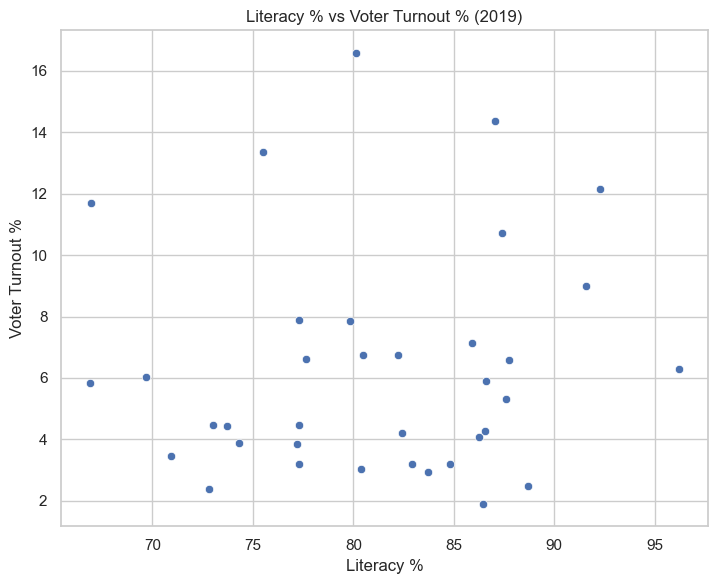

In [58]:

literacy_data = pd.read_csv('datasets/literacy_rate.csv')  # Ensure you have this CSV file

def calculate_voter_turnout(df):
    df['total_votes'] = df['general_votes'] + df['postal_votes']
    df['voter_turnout_pct'] = (df['total_votes'] / df['total_electors']) * 100
    return df

election_data_2019 = calculate_voter_turnout(election_data_2019)

def aggregate_by_state(df):
    aggregated = df.groupby('state').agg({
        'voter_turnout': 'mean'
    }).reset_index()
    return aggregated


agg_data_2019 = aggregate_by_state(election_data_2019)

# Assuming the literacy_data has columns 'state' and 'literacy_pct'

agg_data_2019 = pd.merge(agg_data_2019, literacy_data, on='state')

# Calculate the Pearson correlation coefficient for 2014 and 2019
corr_2019, _ = pearsonr(agg_data_2019['literacy_rate'], agg_data_2019['voter_turnout'])


print(f"Correlation between Literacy % and Voter Turnout % in 2019: {corr_2019}")

# Plot the data to visualize the correlation
plt.figure(figsize=(14, 6))



plt.subplot(1, 2, 2)
sns.scatterplot(x='literacy_rate', y='voter_turnout', data=agg_data_2019)
plt.title('Literacy % vs Voter Turnout % (2019)')
plt.xlabel('Literacy %')
plt.ylabel('Voter Turnout %')

plt.tight_layout()
plt.show()
